In [330]:
import pandas as pd
import numpy as np

## Load Dataset

In [332]:
# Load dataset
df = pd.read_csv("sales_and_customer_insights.csv")
df.head()

,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,2022-10-15,2023-01-02,Spring,Afternoon,Discount
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,2022-03-20,2023-03-23,Spring,Evening,Discount
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,2022-11-09,2023-10-28,Spring,Morning,Discount


## Data Overview & Understanding

In [334]:
df.shape

(10000, 15)

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               10000 non-null  object 
 1   Product_ID                10000 non-null  object 
 2   Transaction_ID            10000 non-null  object 
 3   Purchase_Frequency        10000 non-null  int64  
 4   Average_Order_Value       10000 non-null  float64
 5   Most_Frequent_Category    10000 non-null  object 
 6   Time_Between_Purchases    10000 non-null  int64  
 7   Region                    10000 non-null  object 
 8   Churn_Probability         10000 non-null  float64
 9   Lifetime_Value            10000 non-null  float64
 10  Launch_Date               10000 non-null  object 
 11  Peak_Sales_Date           10000 non-null  object 
 12  Season                    10000 non-null  object 
 13  Preferred_Purchase_Times  10000 non-null  object 
 14  Retenti

In [336]:
df.describe()

,Purchase_Frequency,Average_Order_Value,Time_Between_Purchases,Churn_Probability,Lifetime_Value
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.955700,110.006022,46.885300,0.501552,5031.930567
std,5.526209,52.096870,24.711746,0.288289,2865.420299
min,1.000000,20.010000,5.000000,0.000000,100.160000
25%,5.000000,65.262500,25.000000,0.250000,2518.775000
50%,10.000000,109.930000,47.000000,0.500000,5012.180000
75%,15.000000,155.480000,68.000000,0.750000,7526.232500
max,19.000000,199.960000,89.000000,1.000000,9999.760000


In [337]:
df.isnull().sum()

Customer_ID                 0
Product_ID                  0
Transaction_ID              0
Purchase_Frequency          0
Average_Order_Value         0
Most_Frequent_Category      0
Time_Between_Purchases      0
Region                      0
Churn_Probability           0
Lifetime_Value              0
Launch_Date                 0
Peak_Sales_Date             0
Season                      0
Preferred_Purchase_Times    0
Retention_Strategy          0
dtype: int64

## Data Cleaning

In [339]:
df = df.drop_duplicates()

In [340]:
df = df.dropna(subset=['Customer_ID', 'Purchase_Frequency', 'Average_Order_Value'])

## Exploratory Data Analysis (EDA)

In [342]:
import matplotlib.pyplot as plt
import seaborn as sns

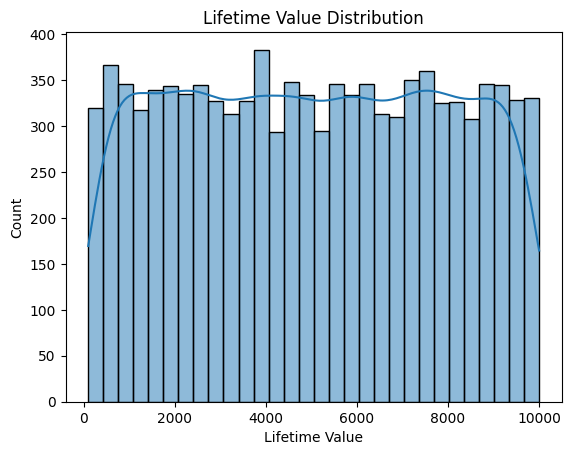

In [343]:
# Distribution of Lifetime Value
sns.histplot(df['Lifetime_Value'], bins=30, kde=True)
plt.title("Lifetime Value Distribution")
plt.xlabel("Lifetime Value")
plt.ylabel("Count")
plt.show()


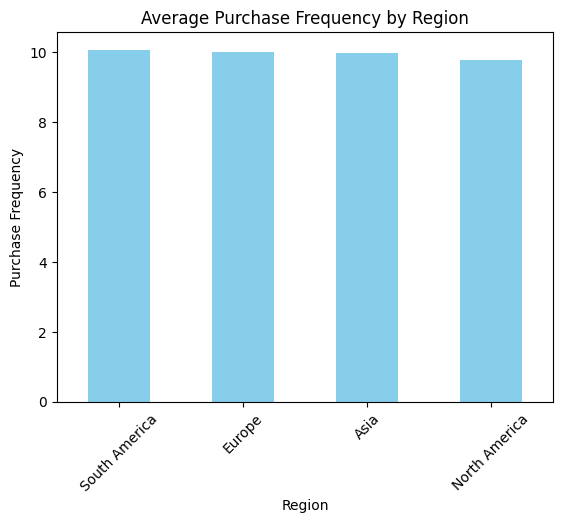

In [344]:
# Purchase Frequency by Region
region_freq = df.groupby('Region')['Purchase_Frequency'].mean().sort_values(ascending=False)
region_freq.plot(kind='bar', color='skyblue')
plt.title("Average Purchase Frequency by Region")
plt.ylabel("Purchase Frequency")
plt.xticks(rotation=45)
plt.show()


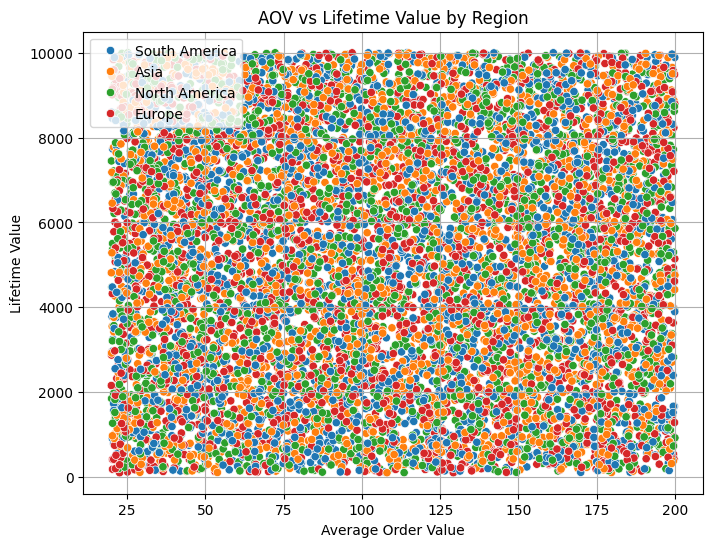

In [345]:
#Average Order Value vs Lifetime Value
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Average_Order_Value', y='Lifetime_Value', hue='Region', palette='tab10')
plt.title("AOV vs Lifetime Value by Region")
plt.xlabel("Average Order Value")
plt.ylabel("Lifetime Value")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

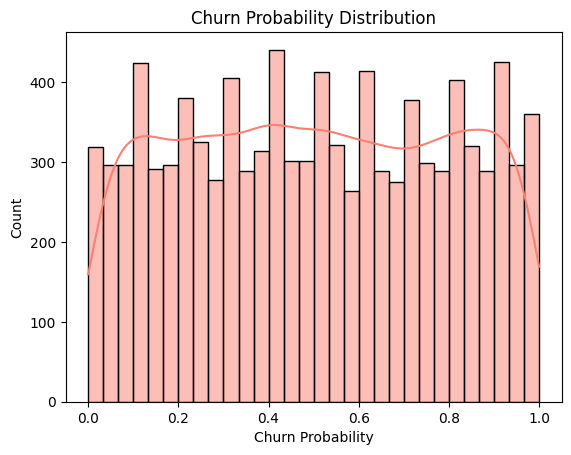

In [346]:
# Churn Probability Distribution
sns.histplot(df['Churn_Probability'], bins=30, kde=True, color='salmon')
plt.title("Churn Probability Distribution")
plt.xlabel("Churn Probability")
plt.ylabel("Count")
plt.show()


C:\Users\yasir\AppData\Local\Temp\ipykernel_24304\3840651972.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Season', y='Time_Between_Purchases', palette='pastel')


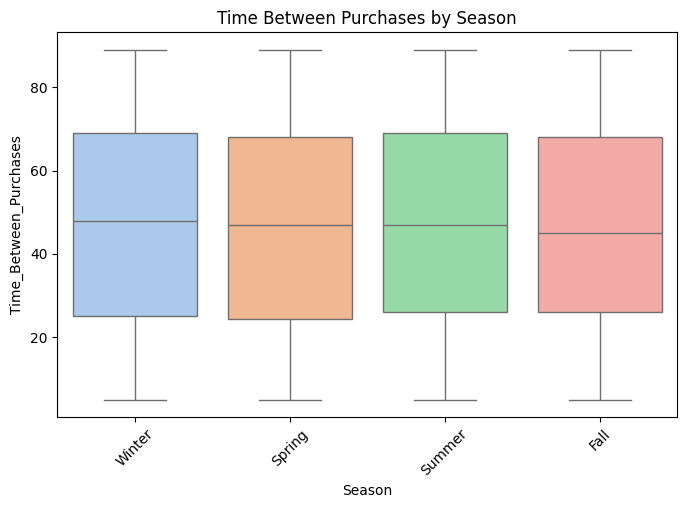

In [347]:
# Time Between Purchases by Season
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Season', y='Time_Between_Purchases', palette='pastel')
plt.title("Time Between Purchases by Season")
plt.xticks(rotation=45)
plt.show()

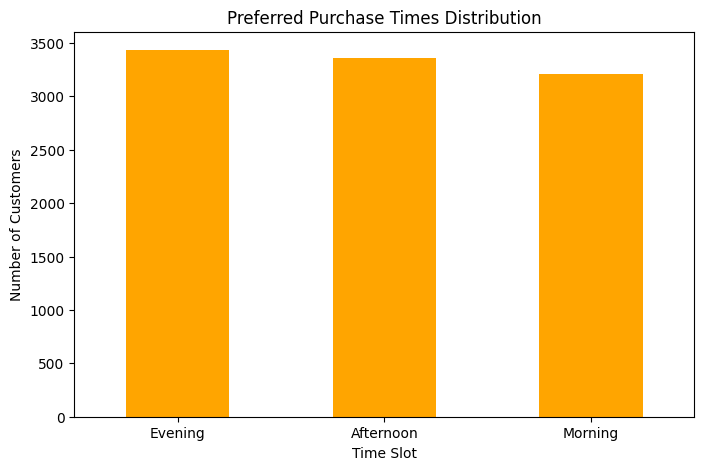

In [348]:
# Preferred Purchase Times Count
plt.figure(figsize=(8, 5))
df['Preferred_Purchase_Times'].value_counts().plot(kind='bar', color='orange')
plt.title("Preferred Purchase Times Distribution")
plt.xlabel("Time Slot")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.show()

#### Checking for Outliers

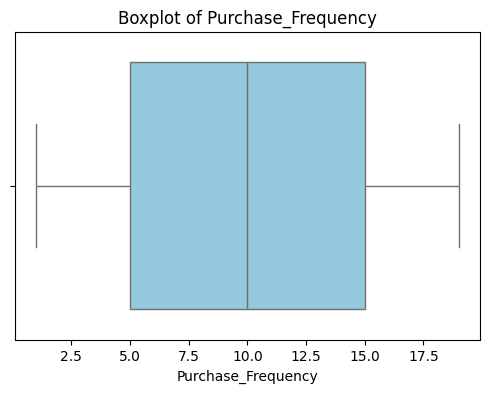

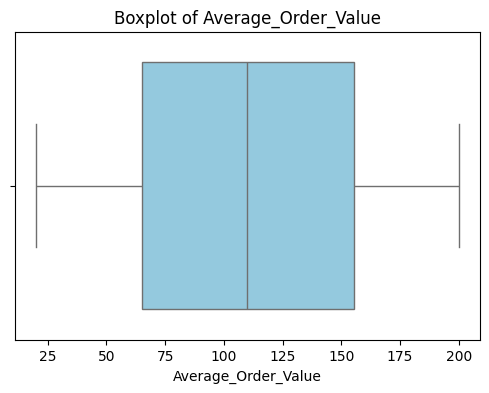

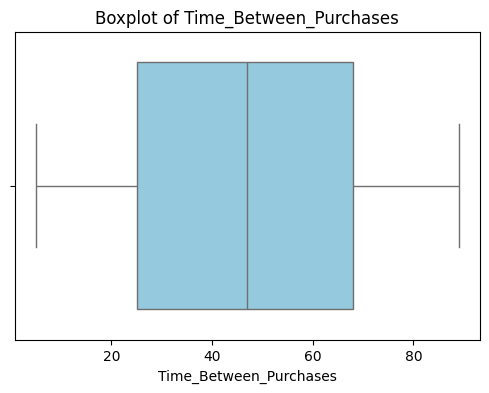

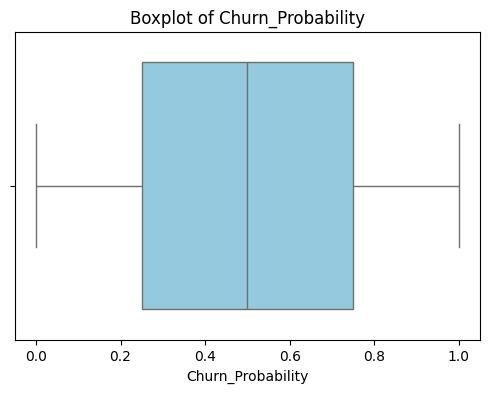

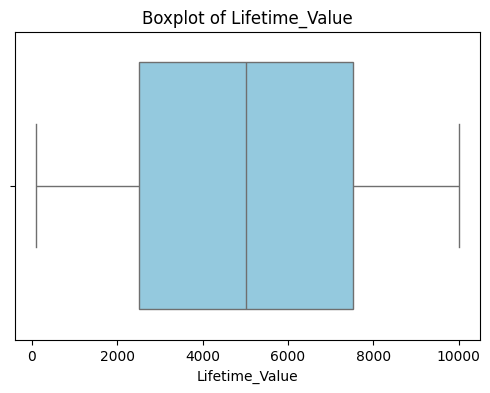

In [349]:
# List of numeric features to check
numeric_features = ['Purchase_Frequency', 'Average_Order_Value', 
                    'Time_Between_Purchases', 'Churn_Probability', 'Lifetime_Value']

# Boxplots for each numeric feature
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [350]:
# IQR-based outlier detection
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    print(f"{column}: {len(outliers)} outliers")
    return outliers

# Check all numeric columns
for feature in numeric_features:
    detect_outliers_iqr(df, feature)


Purchase_Frequency: 0 outliers
Average_Order_Value: 0 outliers
Time_Between_Purchases: 0 outliers
Churn_Probability: 0 outliers
Lifetime_Value: 0 outliers


## Feature Engineering

In [490]:
# Select relevant features for clustering
customer_df = df[['Customer_ID', 'Purchase_Frequency', 'Average_Order_Value',
                  'Time_Between_Purchases', 'Churn_Probability', 'Lifetime_Value']].copy()

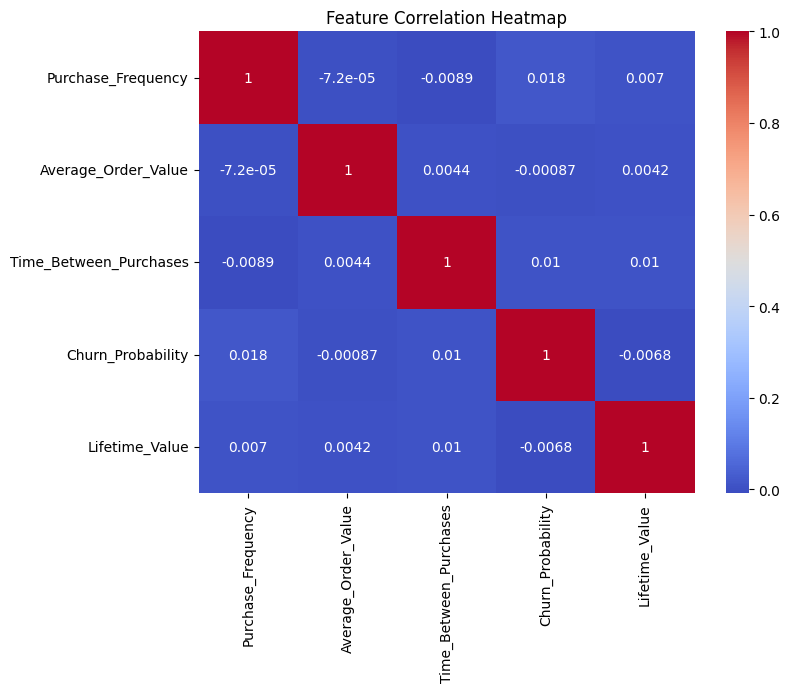

In [494]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = customer_df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [353]:
# Rename for clarity
customer_df.rename(columns={'Customer_ID': 'CustomerID'}, inplace=True)

In [354]:
customer_df.head()

,CustomerID,Purchase_Frequency,Average_Order_Value,Time_Between_Purchases,Churn_Probability,Lifetime_Value
0,CUST_9HOS83,17,172.57,45,0.98,952.81
1,CUST_AJU17N,10,64.89,6,0.66,5427.51
2,CUST_11XNYF,3,120.38,23,0.60,3994.80
3,CUST_IGH8G3,12,70.34,5,0.78,4880.01
4,CUST_OK6PUM,18,42.39,10,0.52,8557.70


## Feature Scaling (Preprocessing)

In [356]:
from sklearn.preprocessing import StandardScaler

In [357]:
features = customer_df.drop('CustomerID', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## KMeans Clustering & Elbow Method

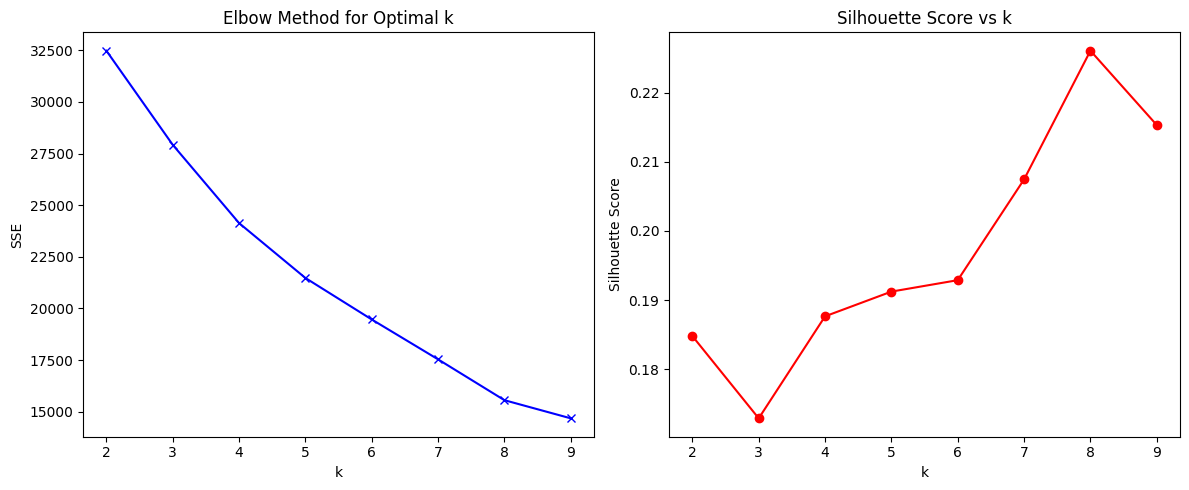

In [359]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Select only numerical features relevant for clustering
features = customer_df[['Purchase_Frequency', 'Average_Order_Value', 'Churn_Probability', 'Lifetime_Value']]

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow and Silhouette analysis
sse = []
silhouette_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(K, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')

plt.tight_layout()
plt.show()


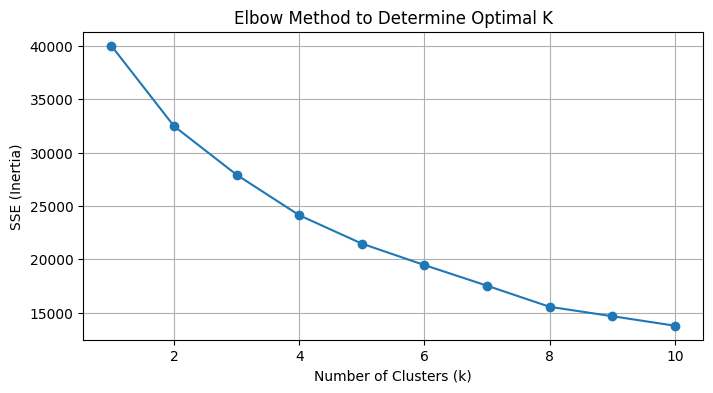

In [360]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.show()


In [456]:
kmeans = KMeans(n_clusters=4, random_state=42)

customer_df['Cluster'] = kmeans.fit_predict(scaled_features)

## Cluster Profiling & Insights

Cluster Summary (with Descriptive Labels):
                                 Purchase_Frequency  Average_Order_Value  \
Cluster Cluster_Label                                                      
0       Infrequent Buyers                  5.387237           108.431332   
1       Loyal & High Value                14.441989            60.852230   
2       High Frequency Churners            5.520130           111.036535   
3       Low Value Fast Buyers             14.410225           160.728494   

                                 Time_Between_Purchases  Churn_Probability  \
Cluster Cluster_Label                                                        
0       Infrequent Buyers                     46.477210           0.494832   
1       Loyal & High Value                    46.732439           0.525888   
2       High Frequency Churners               47.733225           0.464181   
3       Low Value Fast Buyers                 46.616345           0.520548   

                               

C:\Users\yasir\AppData\Local\Temp\ipykernel_24304\1587402658.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_df, x='Cluster', y=feature, palette='viridis')


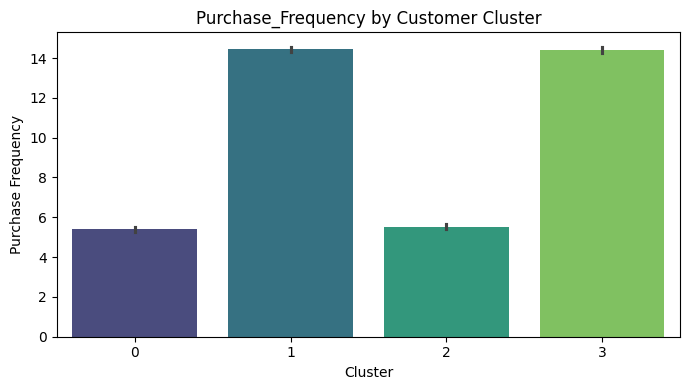

C:\Users\yasir\AppData\Local\Temp\ipykernel_24304\1587402658.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_df, x='Cluster', y=feature, palette='viridis')


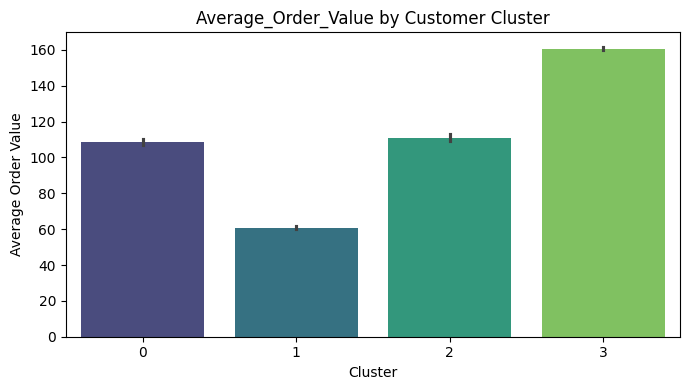

C:\Users\yasir\AppData\Local\Temp\ipykernel_24304\1587402658.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_df, x='Cluster', y=feature, palette='viridis')


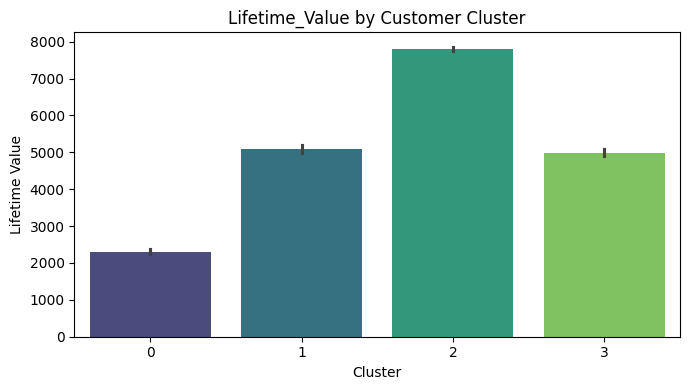

C:\Users\yasir\AppData\Local\Temp\ipykernel_24304\1587402658.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_df, x='Cluster', y=feature, palette='viridis')


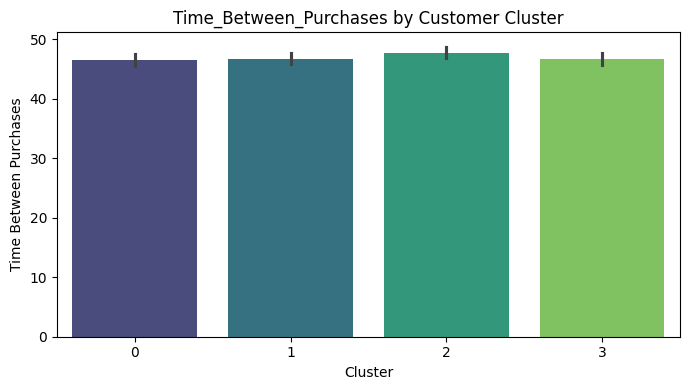

C:\Users\yasir\AppData\Local\Temp\ipykernel_24304\1587402658.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_df, x='Cluster', y=feature, palette='viridis')


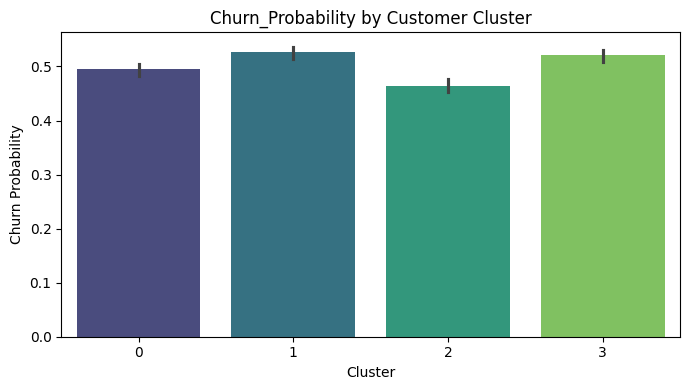

In [458]:
# Add descriptive labels for each cluster based on profiling
cluster_labels = {
    0: "Infrequent Buyers",
    1: "Loyal & High Value",
    2: "High Frequency Churners",
    3: "Low Value Fast Buyers"
}

customer_df['Cluster_Label'] = customer_df['Cluster'].map(cluster_labels)
cluster_summary = customer_df.groupby(['Cluster', 'Cluster_Label']).agg({
    'Purchase_Frequency': 'mean',
    'Average_Order_Value': 'mean',
    'Time_Between_Purchases': 'mean',
    'Churn_Probability': 'mean',
    'Lifetime_Value': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'NumCustomers'})

print("Cluster Summary (with Descriptive Labels):")
print(cluster_summary)

profile_features = ['Purchase_Frequency', 'Average_Order_Value', 'Lifetime_Value', 'Time_Between_Purchases', 'Churn_Probability']
for feature in profile_features:
    plt.figure(figsize=(7, 4))
    sns.barplot(data=customer_df, x='Cluster', y=feature, palette='viridis')
    plt.title(f'{feature} by Customer Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature.replace('_', ' '))
    plt.tight_layout()
    plt.show()


## PCA for Cluster Visualization

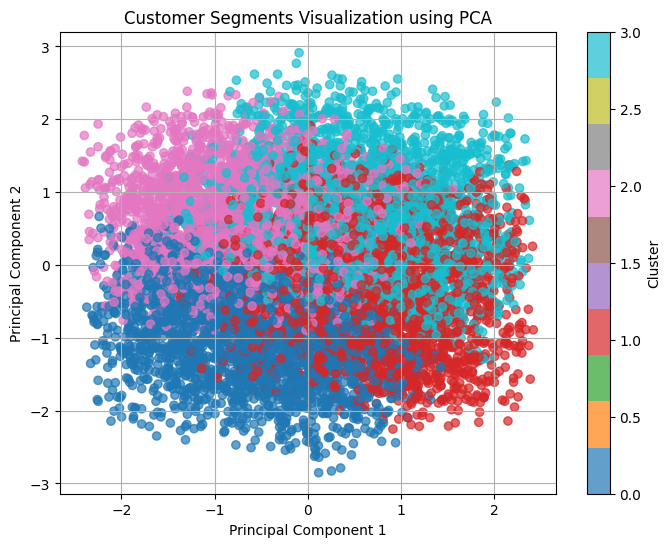

In [460]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=customer_df['Cluster'], cmap='tab10', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segments Visualization using PCA')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [462]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_features, customer_df['Cluster'])
print(f'Silhouette Score: {score:.2f}')



Silhouette Score: 0.19


In [464]:
cluster_profile = customer_df.groupby('Cluster')[[
    'Purchase_Frequency', 
    'Average_Order_Value', 
    'Churn_Probability', 
    'Lifetime_Value'
]].mean()

cluster_profile['Customer_Count'] = customer_df['Cluster'].value_counts()
cluster_profile = cluster_profile.sort_index()
print(cluster_profile)


         Purchase_Frequency  Average_Order_Value  Churn_Probability  \
Cluster                                                               
0                  5.387237           108.431332           0.494832   
1                 14.441989            60.852230           0.525888   
2                  5.520130           111.036535           0.464181   
3                 14.410225           160.728494           0.520548   

         Lifetime_Value  Customer_Count  
Cluster                                  
0           2308.734705            2523  
1           5093.538204            2534  
2           7807.564961            2459  
3           4987.334928            2484  


In [466]:
import joblib

joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [468]:
new_customer = {
    'Purchase_Frequency': 10,
    'Average_Order_Value': 120,
    'Churn_Probability': 0.3,
    'Lifetime_Value': 5000
}


In [470]:
# Convert to DataFrame
new_df = pd.DataFrame([new_customer])

# Load saved scaler and model
scaler = joblib.load('scaler.pkl')
kmeans = joblib.load('kmeans_model.pkl')

# Scale the new data
new_scaled = scaler.transform(new_df)

# Predict the cluster
predicted_cluster = kmeans.predict(new_scaled)[0]
print("Predicted Segment:", predicted_cluster)

Predicted Segment: 3


In [478]:
cluster_labels = {
    0: "Infrequent Buyers (Rarely Purchase)",
    1: "Loyal & High Value",
    2: "High Frequency Churners",
    3: "Low Value Fast Buyers (Best Buyer)"
}

print("Segment Label:", cluster_labels[predicted_cluster])

Segment Label: Low Value Fast Buyers (Best Buyer)


# Testing the Model --

In [480]:
# New low-value customer details
low_new_customer = {
    'Purchase_Frequency': 2,
    'Average_Order_Value': 45.0,
    'Churn_Probability': 0.85,
    'Lifetime_Value': 1500
}

# Convert to DataFrame
new_df = pd.DataFrame([low_new_customer])

# Load saved scaler and model
scaler = joblib.load('scaler.pkl')
kmeans = joblib.load('kmeans_model.pkl')

# Scale the new data
new_scaled = scaler.transform(new_df)

# Predict the cluster
predicted_cluster = kmeans.predict(new_scaled)[0]
print("Predicted Segment:", predicted_cluster)
print("Segment Label:", cluster_labels[predicted_cluster])

Predicted Segment: 0
Segment Label: Infrequent Buyers (Rarely Purchase)


In [482]:
# New high-value customer details
high_new_customer = {
    'Purchase_Frequency': 30,
    'Average_Order_Value': 510.0,
    'Churn_Probability': 0.5,
    'Lifetime_Value': 30000
}

# Convert to DataFrame
new_df = pd.DataFrame([high_new_customer])

# Load saved scaler and model
scaler = joblib.load('scaler.pkl')
kmeans = joblib.load('kmeans_model.pkl')

# Scale the new data
new_scaled = scaler.transform(new_df)

# Predict the cluster
predicted_cluster = kmeans.predict(new_scaled)[0]
print("Predicted Segment:", predicted_cluster)
print("Segment Label:", cluster_labels[predicted_cluster])

Predicted Segment: 3
Segment Label: Low Value Fast Buyers (Best Buyer)


In [546]:
# New high-value customer details
Yasir_customer = {
    'Purchase_Frequency': 14,
    'Average_Order_Value': 100,
    'Churn_Probability': 0.4,
    'Lifetime_Value': 2000
}

# Convert to DataFrame
new_df = pd.DataFrame([Yasir_customer])

# Load saved scaler and model
scaler = joblib.load('scaler.pkl')
kmeans = joblib.load('kmeans_model.pkl')

# Scale the new data
new_scaled = scaler.transform(new_df)

# Predict the cluster
predicted_cluster = kmeans.predict(new_scaled)[0]
print("Predicted Segment:", predicted_cluster)
print("Segment Label:", cluster_labels[predicted_cluster])

Predicted Segment: 1
Segment Label: Loyal & High Value
